<div style="clear:left"></div>

# FBA Tutorial 9b - Plotting

As in the previous tutorial, we will be using the **admissions.csv** file (available from the moodle page). This file describes people who are applying for a postgraduate degree at a US university, and indicates 3 relevant features about an applicant… as well as whether they got into to the masters or PhD course they were applying for when they were selected by hand (note that if we were doing a full analytics project, this would be our target class!):

* The dataset has a binary output feature (i.e. dependent variable) called "admit". 
* There are three predictor variables: gre, gpa and ranking. 
* Variables gre (a exam result score) and gpa (the person’s grade point average) are continuous.
* The variable ranking takes on the values 1 through 4. Institutions with a rank of 1 have the highest prestige, while those with a rank of 4 have the lowest. 

# Section A

This section focus on data loading and pre-processing using Pandas

### Step A1 
Using the **pandas** library and its **read_csv()** function, load the data of the file **admissions.csv** into a DataFrame.

In [3]:
import pandas as pd

df = pd.read_csv('admissions.csv')

### Step A2

This should become a good habit, each time you load new data, check that it has been loaded correctly using the **head()** method.

In [4]:
df.head(5)

,admit,gre,gpa,ranking
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


### Step A3 - Updating a column

For clarity we want to replace the values of the column admit to True if it is equal to 1 or False if it is equal to 0. For this, you will need to use the **loc( )** method from **Pandas**.

In [5]:
df.loc[df.admit == 1, 'admit'] = True
df.loc[df.admit == 0, 'admit'] = False

In [6]:
# It is always good to check your operation
# had the expected output!
df.head()

,admit,gre,gpa,ranking
0,False,380,3.61,3
1,True,660,3.67,3
2,True,800,4.00,1
3,True,640,3.19,4
4,False,520,2.93,4


### Step A4 - An overview of our data

So far so good, but one final thing - we really want to show how each feature’s values differ for one class compared to the other  (this would be useful for example, in a coursework to investigate who buy a product and don’t)

Let’s do this now by separating the positives (admitted - True) from the negatives (rejected - False) in our dataset. Using pandas filtering, assign to a variable **pos** the dataframe of students who were admitted and to a variable **neg** the students that were rejected.

In [7]:
pos = df[df.admit] # That can only be written because we have converted admit to a Boolean value and want the positives.
neg = df[df.admit == False]

What this means is that we now can print summary statistics to compare between successful and unsuccessful applicants using the **describe( )** method on the two separate dataframes.

In [8]:
pos.describe()

,gre,gpa,ranking
count,127.000000,127.000000,127.000000
mean,618.897638,3.489213,2.149606
std,108.884884,0.370177,0.917889
min,300.000000,2.420000,1.000000
25%,540.000000,3.220000,1.000000
50%,620.000000,3.540000,2.000000
75%,680.000000,3.755000,3.000000
max,800.000000,4.000000,4.000000


In [9]:
neg.describe()

,gre,gpa,ranking
count,273.000000,273.000000,273.000000
mean,573.186813,3.343700,2.641026
std,115.830243,0.377133,0.917198
min,220.000000,2.260000,1.000000
25%,500.000000,3.080000,2.000000
50%,580.000000,3.340000,3.000000
75%,660.000000,3.610000,3.000000
max,800.000000,4.000000,4.000000


What, if anything, can you see that is surprising or noteworthy to report back concerning these? (tip - check which feature is higher for admissions and rejections)

***What would you comment on concerning these comparisons between rejections and admissions to feedback to a client?***

# Section B

This section focuses on the use of matplotlib.

### Step B1 - A picture is as good as a thousand words...

There are definitely some oddities here. And how best to illustrate those? Well, statistics are all good, but graphs are often better to demonstrate things you have found in your analyses. As you’ve seen in another (rival) module, Tableau is a really useful bit of software for throwing graphs together - its always fine to use good software like that.

But it’s also very easy in python thanks to the “matplotlib”  library (and its extensions) so let’s just see how we could make a bar chart comparing the number of datapoints which were positive and negative.

First, here is how we can do it the 'manual' way using matplotlib:

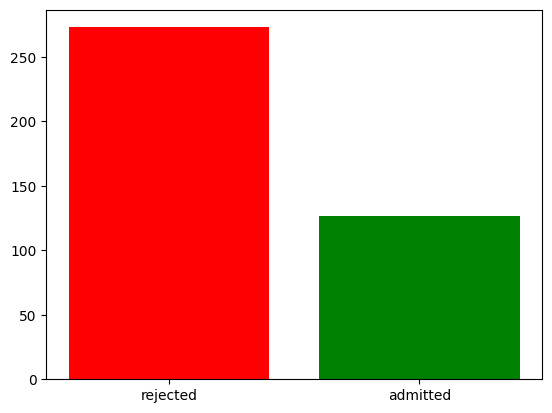

In [38]:
import matplotlib.pyplot as plt

labels = ['rejected', 'admitted']
values = [len(neg), len(pos)]
plt.bar([0, 1], values, align='center', color=['red', 'green'])
plt.xticks([0, 1], labels)
plt.show()

Well, that wasn’t too bad… but it was several lines let’s break what is going on here down line by line:
1. We import the matplotlib library (and call it “plt”) so we can use its functions
2. We create a list of the labels for the bars.
3. We create a list of values for the bar’s heights (in this case the no. of items in each category).
4. We create the bar chart (which a column at positions 0 and 1, aligning the bars to the centre and making them red and green in colour.
5. We add the bar’s labels to the plot.
6. And finally we show the results on screen.

### Step B2 - Visualising the mean

Now let’s create a bar chart for the mean gpa score for each class by copying and altering the code of the previous step.

You can compute the mean using either a Pandas method or a Numpy function for example.

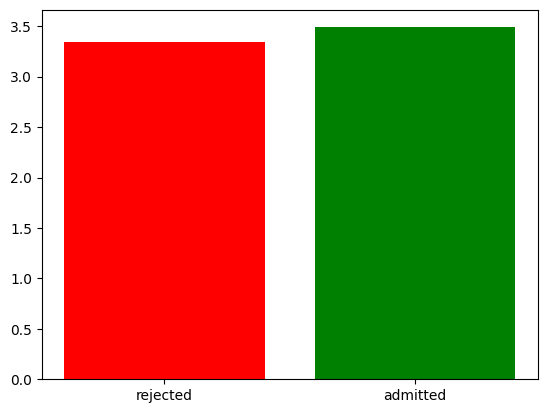

In [26]:
labels = ['rejected', 'admitted']
values = [neg.gpa.mean(), pos.gpa.mean()]
plt.bar([0, 1], values, align='center', color=['red', 'green'])
plt.xticks([0, 1], labels)
plt.show()

### Step B3 - Visualising the mean variance

Create a bar chart for the mean of the variance score for each class (you might want to use numpy function np.var() to do this rather than square the standard deviation).

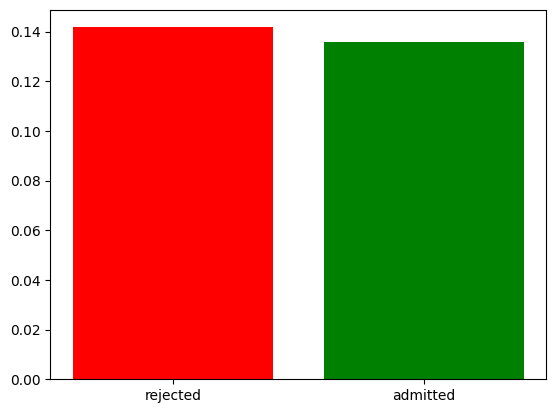

In [27]:
import numpy as np

labels = ['rejected', 'admitted']
values = [np.var(neg.gpa), np.var(pos.gpa)]
plt.bar([0, 1], values, align='center', color=['red', 'green'])
plt.xticks([0, 1], labels)
plt.show()

Now, yes, these images still have a horrible grey background, and the fonts aren’t the most beautiful, but these are all editable. Take a look at the tutorials online for making beautiful matplotlib graphs (they are easy to cut and paste) if you get a chance. 

However, we have a second option using this time the **seaborn** library.

# Section C

This section focuses on the use of Seaborn

### Step C1 - Repoducing B1 in Seaborn

We want to reproduce the graph done at Step B1 using Seaborn this time. The first thing, as usual and as described in the lecture, is to import the necessary module(s).

Note that in this case, matplotlib.pyplot has already been imported for the previous questions so we don't need to re-import it.

In [28]:
import seaborn as sns

Normally when using seaborn, the plot should be displayed without the need to use plt.show(). However, if the environment is non-interactive, you may either need to use plt.show()
or simply use the magic line: %matplotlib inline, to set the environment to output the plot commands inline with the notebook cells

In [36]:
%matplotlib inline

We can then produce the bar plot using the following code:

<AxesSubplot:xlabel='admit', ylabel='gpa'>

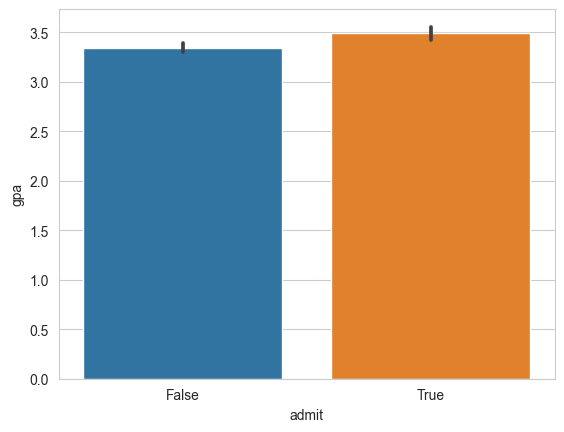

In [44]:
sns.barplot(x='admit', y='gpa', data=df)
# plt.show()
# OR
#sns.barplot(data=[neg.gpa, pos.gpa])

### Step C2 - Styling the plot

Seaborn has a range of colour palettes (look them up on google). You can specify a palette by adding the following argument to your plotting code (in our case the call to the barplot function):

> palette = 'Set1'

But it also has lots of built in style’s for the whole graph. Let’s try one now by adding the following line before your barplot command:

> sns.set_style('whitegrid')

Rerun and you’ll see you now have a graph worth of using in a report. Feel free to take a look at some other options for these styles:
* darkgrid
* whitegrid
* dark
* white
* ticks

Try different styles to make the plot a bit prettier !

### Step C3 - Boxplots

Finally, let’s abandon bar charts all together. They are fine for just listing the counts of admissions here, but they will tell us very little information about our covariates - gpa scores, gre scores and university rankings. What we really want as analysts are box plots!

Copy the code from C1 and convert it to use boxplots instead. You can refer to the documentation to find how the boxplot function is used:

http://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot


<AxesSubplot:xlabel='admit', ylabel='gpa'>

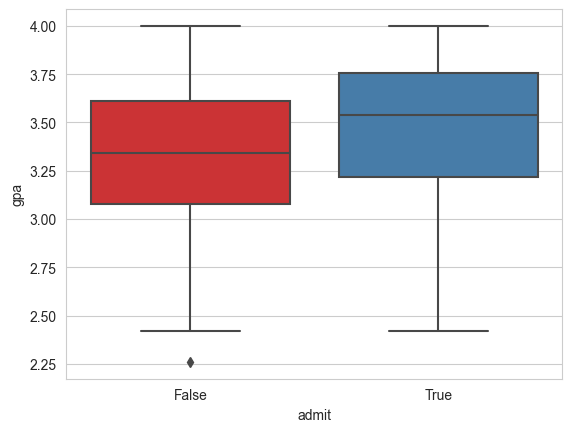

In [45]:
sns.boxplot(x='admit', y='gpa', data=df, palette='Set1')

Each solid box represents the second and third quartiles of the data indicating the spread/variance of the data, the horizontal line through each box is the mean, and the vertical lines show the limits of the dataset. All useful stuff for interpretation.

That’s all there is to it for producing nice graphs. There’s a huge amount of options to play around with, and I recommend having a go on the different options for adding labels, changing fonts, using different palettes and so on (I’ll leave you to google the endless tutorials and documentation on matplotlib and seaborn at your leisure!)

*Having said that there is also a competitor to boxplots that’s worth noting in the form of violinplots*

### Step C4 - Violinplots

Finally produce a violin plot for the GPA scores using the sns.violinplot() method. It’s as simple as changing the method name in your code. Once again, you can use the online documentation to find the different options available is you need further tweaking.


<AxesSubplot:xlabel='admit', ylabel='gpa'>

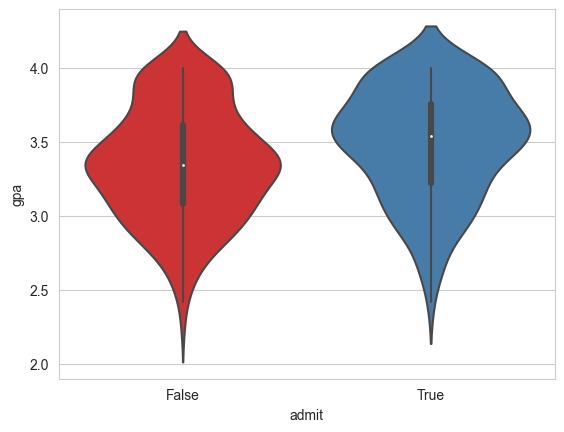

In [46]:
sns.violinplot(x='admit', y='gpa', data=df, palette='Set1')

Now we can see the exact distribution of the data. Not bad, but is it better? You decide.

## Section D

In this section we are going to focus on the relationship between GRE and GPA scores using different techniques and adding sklearn to our set of tools.

### Step D1 - Pearson Correlation

Ok let’s start exploring the data with a model. Pearson Correlation is the key factor in a linear regression - the further it is from zero the stronger the linear relationship (even though we all know now, that linear relationships certainly don’t tell the whole story). Let’s use numpy to find that correlation between the GRE and GPA scores:

In [47]:
import numpy as np

r = np.corrcoef(df.gpa, df.gre)
print(r)

[[1.         0.38426588]
 [0.38426588 1.        ]]


As you can see, you get a matrix output (you can check the type using **print(type(r))** if you want). The only score that matters is the first line, second column (or second line, first column which is the same)  - that’s the correlation between the variables we care about.. Given that this number is part of a matrix (ndarray), try to extract it using **Numpy** indexes.

In [48]:
print(type(r))
corr = r[0, 1]
print(corr)

<class 'numpy.ndarray'>
0.38426587802084894


More than numbers, data analysts need to understand what they mean. You have now obtained a number for the Pearson Correlation of our two variables. What do you think of this correlation? Is this correlation strong, low or medium?

### Step D2 - Importing Sklearn

This is still just a descriptive correlation score and won’t actually help us predict anything. To actually try and predict someone’s GRE exam score from their GPA average we need a linear model. You have seen that it can easily be done using **Orange** with a graphical interface. It is almost as easy in Python thanks to the **sklearn** library, so let's give it a go!

The first step is to import the library using the **from** *module* **import** *submodule* syntax. From the library **sklearn** we want to import the submodule **linear_model**, try to write that import statement.

In [49]:
from sklearn import linear_model

### Step D3 - Create our features

It’s a tradition from the olden days of yore, when people still used punchcards to program computers, that when we create predictive models we always call our input features “X” and our output features “Y”. So let’s just quickly do that, we have a DataFrame containing our data from which we want to extract **gpa** (our input feature) and **gre** (our ouput feature) and store them respectively in variables X and Y.


In [50]:
X = df[['gpa']]
Y = df[['gre']]

Note that this time we don’t just use data.gpa to extract the field’s data. This is because we want it in the form of a matrix (and not a vector, which is what data.gpa would give us). If you want to see the difference try following code:

In [51]:
print(df.gpa.shape)
print(df[['gpa']].shape)

(400,)
(400, 1)


When you run this you will see that data.gpa only has one dimension (it is a vector), whereas our new version has two dimensions (albeit being a matrix with only one row in it!). The difference is subtle but just trust me for now - this means it will be in the perfect format ready to feed to sklearn as it uses matrices.

### Step D4 - Linear Regression

Create a linear regression model, not by dropping on a widget like Orange... but by typing the following couple of lines:

In [52]:
model = linear_model.LinearRegression()
model.fit(X,Y)
print(model.coef_, model.intercept_)

[[116.63935631]] [192.30424605]


Et voila.  Job done. The first line creates an ‘empty’ model ready for us to train. The second line does the training by finding the correct line that ‘fits’ the data. The final line prints out the $m$ and the $c$ in the equation $y = mx+c$. Job done.

##### Quick challenge: 

Any thoughts on what the connection between the gradient coefficient (coef_) and correlation (r) are? DON’T CHEAT ;)
##### Answer: 

If you standardize your data the correlation is the gradient coefficient. The closer that line is to 1 (or -1) the stronger the link!

Just to prove the above (and to show you how to standardize your data - which is vital for distance measure based predictors) add the following lines before you created your linear model:

In [53]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
Y_scaled = preprocessing.scale(Y.astype(float))

Sklearn gives us a special set of functions to do this sort of thing. By default scale() will standardize your data (i.e. mean centre the data and divide through by its variance), making all data “measure-less”. This means we can use it more readily in anything that compares distances, and all the datapoints are now comparable on any feature…. whatever the scale it originally used. 

**Re-run your LinearRegression fitting using X_scaled and Y_scaled this time, and confirm that the correlation you calculated via numpy is the same as the linear regression gradient coefficient!**


In [54]:
model2 = linear_model.LinearRegression()
model2.fit(X_scaled, Y_scaled)
print(model2.coef_, model2.intercept_)

[[0.38426588]] [-4.92354439e-16]


### Step D5 - Matplotlib & Linear Regression

We can plot the regression line obtained on top of the data in matplotlib using the following code:

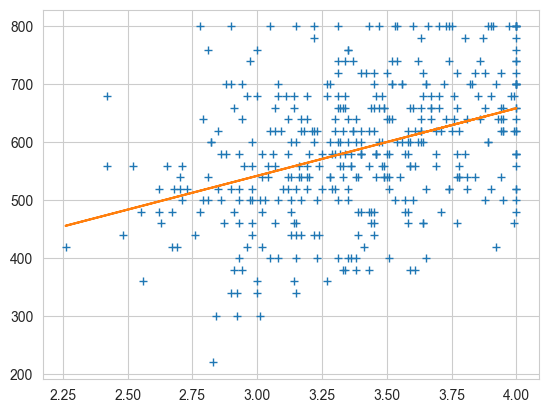

In [55]:
plt.plot(df.gpa, df.gre, '+')
lrline = model.coef_[0][0] * df.gpa + model.intercept_[0]
plt.plot(df.gpa, lrline)
plt.show()

### Step D6 - Seaborn & Linear Regression

Try to obtain a similar visualisation using Seaborn and its lmplot() function. You can refer to the lecture slides and the online documentation of Seaborn to know more about its usage. Its a whole lot easier than the matplotlib code!

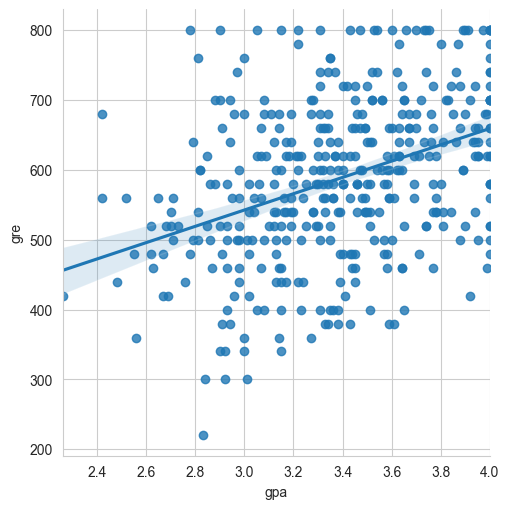

In [56]:
sns.lmplot(x='gpa', y='gre', data=df)